In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [4]:
columns_to_convert = ['Education_Level', 'Marital_Status', 'Income_Category']

for column in columns_to_convert:
    df[column] = df[column].replace('Unknown', np.nan)

In [5]:
df['Attrition_Flag'] = pd.Categorical(df['Attrition_Flag'], categories=['Existing Customer', 'Attrited Customer'])
df['Gender'] = pd.Categorical(df['Gender'], categories=['M', 'F'])
df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=['Uneducated','High School','College', 'Graduate' ,'Post-Graduate','Doctorate'],ordered=True)
df['Marital_Status'] = pd.Categorical(df['Marital_Status'], categories=['Married', 'Single', 'Divorced'])
df['Income_Category'] = pd.Categorical(df['Income_Category'], categories=['Less than $40K','$40K - $60K','$60K - $80K', '$80K - $120K',  '$120K +'],ordered=True)
df['Card_Category'] = pd.Categorical(df['Card_Category'], categories=['Blue','Gold','Silver', 'Platinum'],ordered=True)

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", trainset.shape)
print("Test set shape:",testset.shape)

Training set shape: (8101, 21)
Test set shape: (2026, 21)


In [7]:
#Imputing missing values using respective modes
education_mode=trainset['Education_Level'].mode()[0]
income_mode=trainset['Income_Category'].mode()[0]
marital_mode=trainset['Marital_Status'].mode()[0]
trainset['Education_Level'].fillna(education_mode, inplace=True)
trainset['Income_Category'].fillna(income_mode, inplace=True)
trainset['Marital_Status'].fillna(marital_mode, inplace=True)
testset['Education_Level'].fillna(education_mode, inplace=True)
testset['Income_Category'].fillna(income_mode, inplace=True)
testset['Marital_Status'].fillna(marital_mode, inplace=True)

# PLS

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [17]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [18]:
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status',
                       'Income_Category', 'Card_Category','Attrition_Flag']

# Apply one-hot encoding to each categorical column
df_encoded = pd.get_dummies(df, columns=categorical_columns)


In [19]:
df_encoded.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Gender_F', 'Education_Level_Uneducated',
       'Education_Level_High School', 'Education_Level_College',
       'Education_Level_Graduate', 'Education_Level_Post-Graduate',
       'Education_Level_Doctorate', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Divorced',
       'Income_Category_Less than $40K', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_$120K +', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Silver', 'Card_Category_Platinum',
       'Attrition_Flag_Existing Customer', 'Attrition_Flag_At

In [20]:
#define predictor and response variables
X = df_encoded[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Gender_F', 'Education_Level_Uneducated',
       'Education_Level_High School', 'Education_Level_College',
       'Education_Level_Graduate', 'Education_Level_Post-Graduate',
       'Education_Level_Doctorate', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Divorced',
       'Income_Category_Less than $40K', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_$120K +', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Silver', 'Card_Category_Platinum']]
Y = df_encoded[['Attrition_Flag_Existing Customer', 'Attrition_Flag_Attrited Customer']]

Text(0.5, 1.0, 'hp')

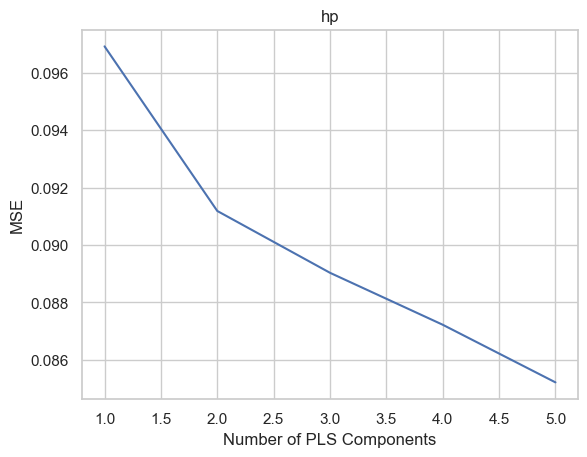

In [21]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), Y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), Y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

In [22]:
# Split the data into training and test sets from encoded dataset
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42) 


pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

0.3083296879597338

In [23]:
x=pls.x_scores_[:,0]
y=pls.x_scores_[:,1]
scores = pd. DataFrame(pls.x_scores_, columns=['x', 'y'])
z=y_train['Attrition_Flag_Existing Customer']
scores_with_Attrition_Flag=pd.concat([scores.reset_index(drop=True),z.reset_index(drop=True)], axis=1)

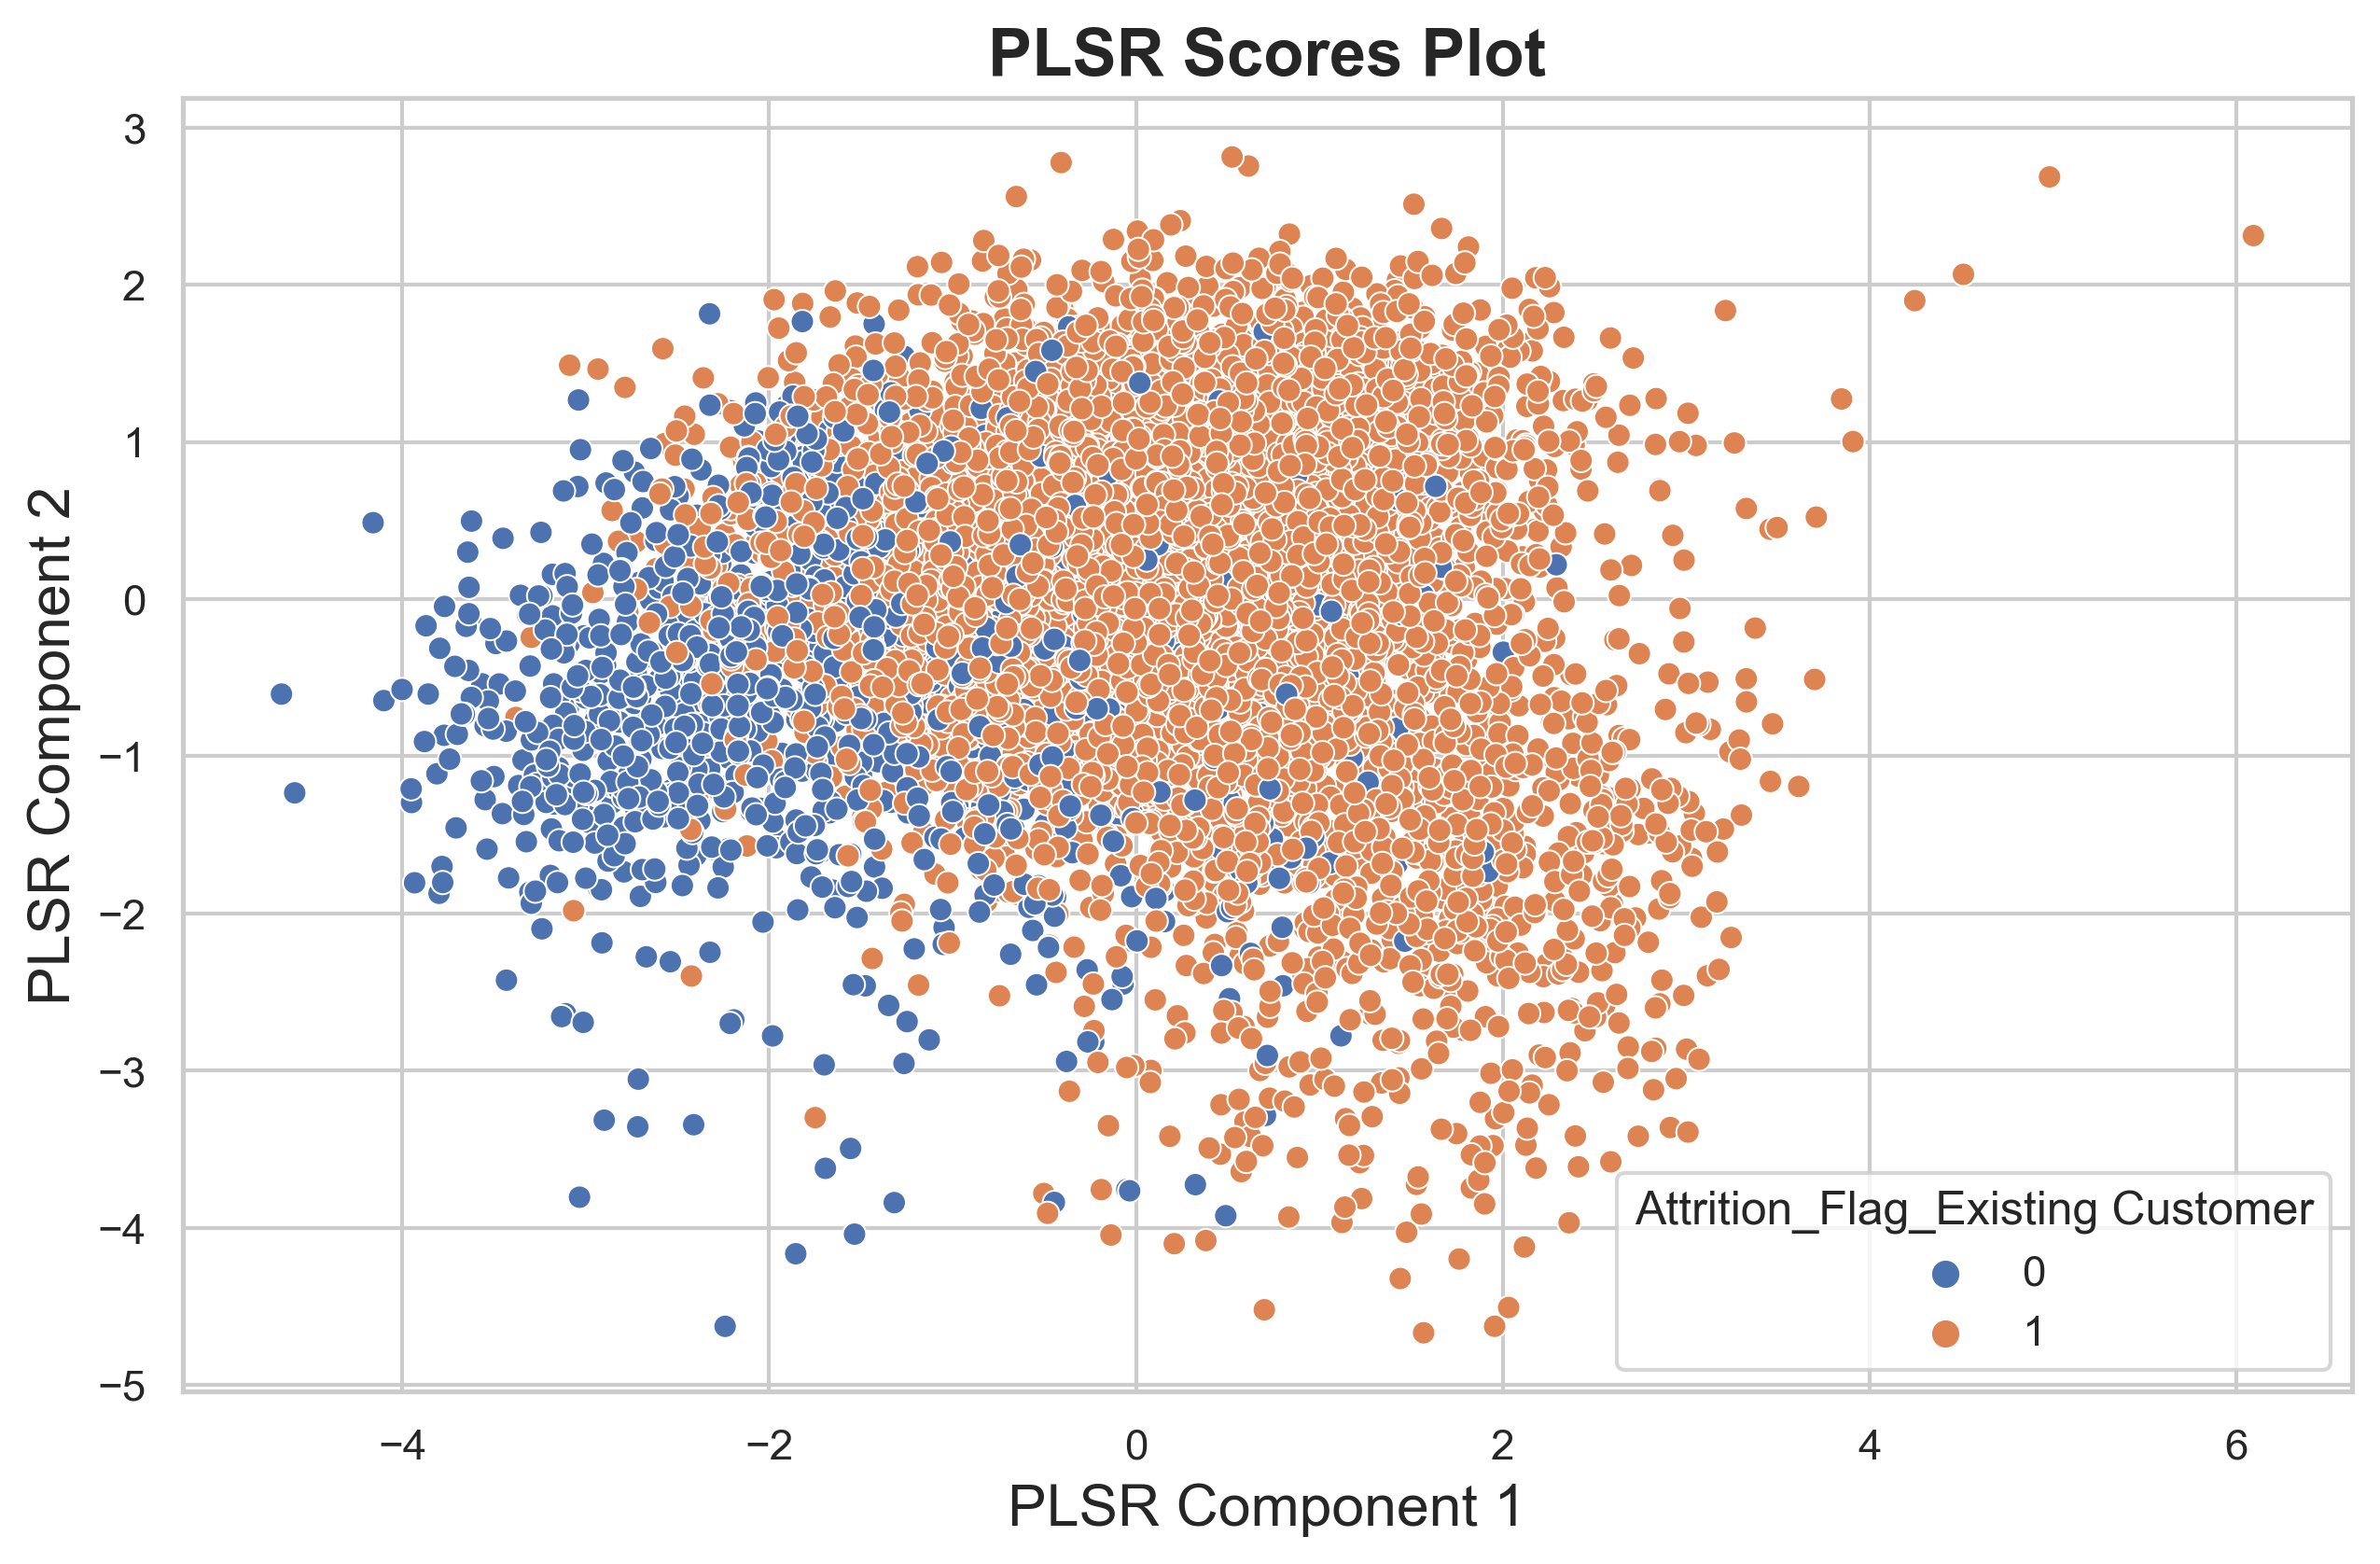

In [25]:
import seaborn
plt.figure(figsize=(10,6),dpi=300)
seaborn.set(style='whitegrid')
fmri = seaborn.load_dataset("fmri")
 
chart=seaborn.scatterplot(x="x",
                    y="y",
                    hue='Attrition_Flag_Existing Customer',
                    data=scores_with_Attrition_Flag)
chart.set_title('PLSR Scores Plot', fontdict={'size': 17, 'weight': 'bold'})
chart.set_xlabel('PLSR Component 1', fontdict={'size': 15})
chart.set_ylabel('PLSR Component 2', fontdict={'size': 15})
plt.savefig('scores.png',dpi=300)
plt.show()


In [27]:
scores_with_Attrition_Flag.isnull().sum()

x                                   0
y                                   0
Attrition_Flag_Existing Customer    0
dtype: int64

Text(0.5, 1.0, 'PLSR Scores Plot')

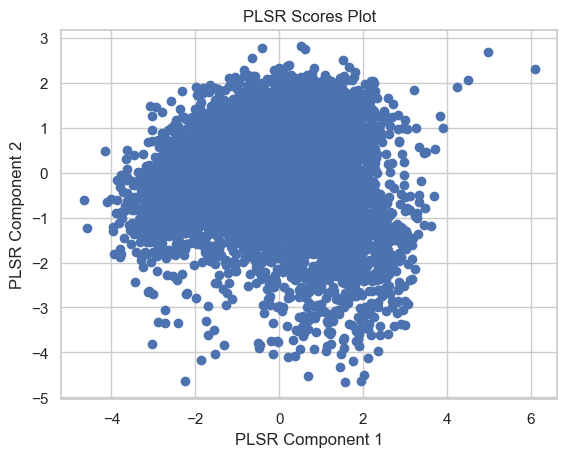

In [28]:
plt.scatter(x, y)
plt.xlabel("PLSR Component 1")
plt.ylabel("PLSR Component 2")
plt.title("PLSR Scores Plot")

In [29]:
loadings = pls.x_loadings_
loadings1= pls.y_loadings_

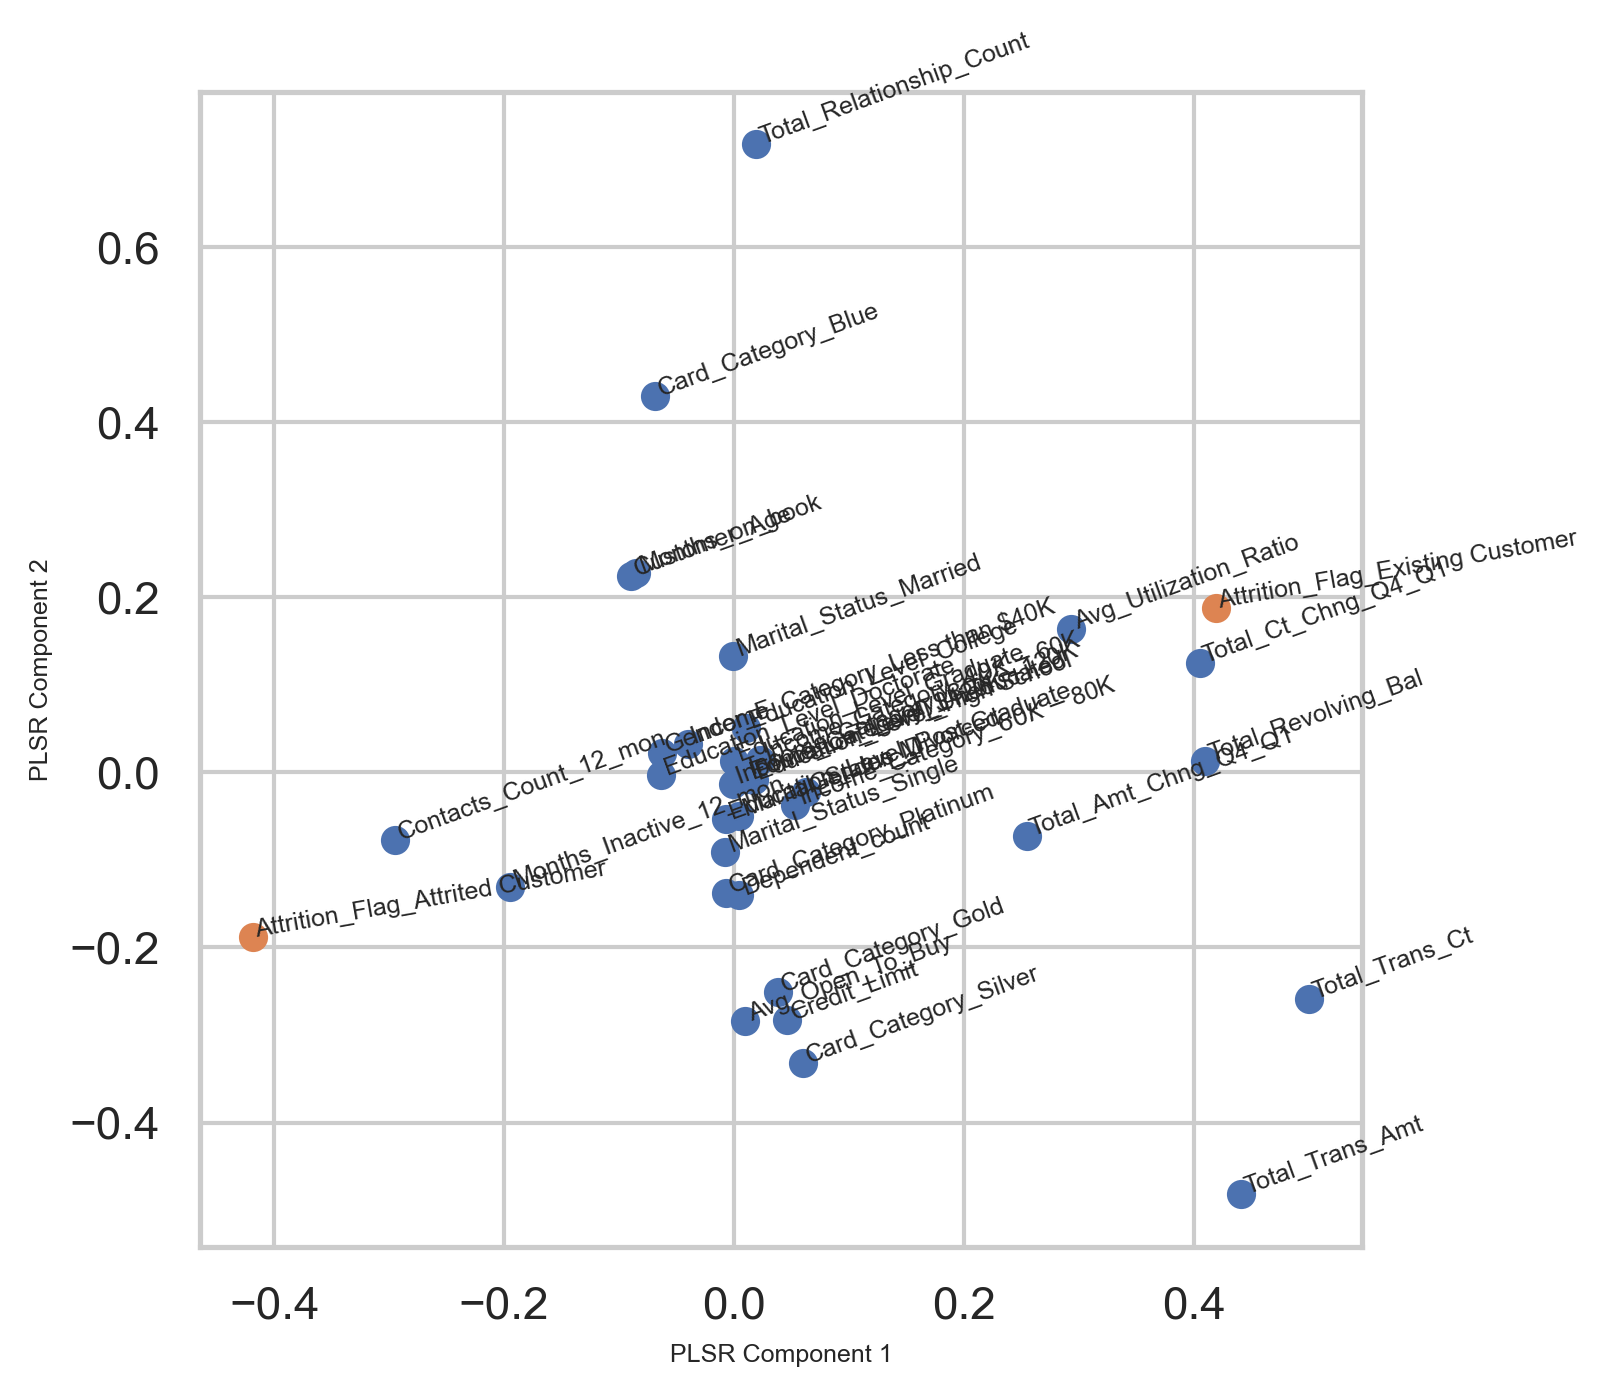

In [30]:
plt.figure(figsize=(5,5),dpi=300)
plt.rcParams.update({'font.size': 6})
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.scatter(loadings1[:, 0], loadings1[:, 1])
for i, feature_name in enumerate(X_train.columns):
    plt.annotate(feature_name, (loadings[i, 0], loadings[i, 1]),rotation=20)
for i, feature_name in enumerate(y_train.columns):
    plt.annotate(feature_name, (loadings1[i, 0], loadings1[i, 1]),rotation=10)    
plt.xlabel('PLSR Component 1')
plt.ylabel('PLSR Component 2')
plt.savefig('loadings.png',dpi=300,bbox_inches='tight')
plt.show()

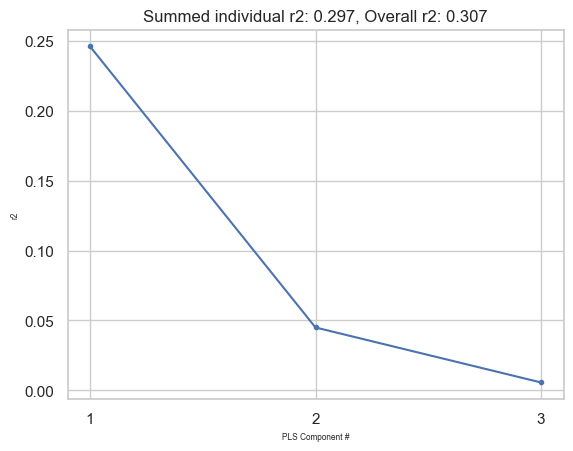

(array([0.24595583, 0.04496964, 0.0056537 ]), 0.3072734517458296)

In [33]:
from sklearn.metrics import r2_score
def pls_explained_variance(pls, X, Y_true, do_plot=True):
    r2 = np.zeros(pls.n_components)
    x_transformed = pls.transform(X) # Project X into low dimensional basis
    for i in range(0, pls.n_components):
        Y_pred = (np.dot(x_transformed[:, i][:, np.newaxis],
                         pls.y_loadings_[:, i][:, np.newaxis].T) * pls._y_std   
                  + pls._y_mean)
        r2[i] = r2_score(Y_true, Y_pred)
        overall_r2 = r2_score(Y_true, pls.predict(X))  # Use all components together.

    if do_plot:
        component = np.arange(pls.n_components) + 1
        plt.plot(component, r2, '.-')
        plt.xticks(component)
        plt.xlabel('PLS Component #'), plt.ylabel('r2')
        plt.title(f'Summed individual r2: {np.sum(r2):.3f}, '
                  f'Overall r2: {overall_r2:.3f}')
        plt.show()

    return r2, overall_r2

pls = PLSRegression(n_components=3).fit(X_train, y_train)
pls_explained_variance(pls,X_test,y_test)